In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

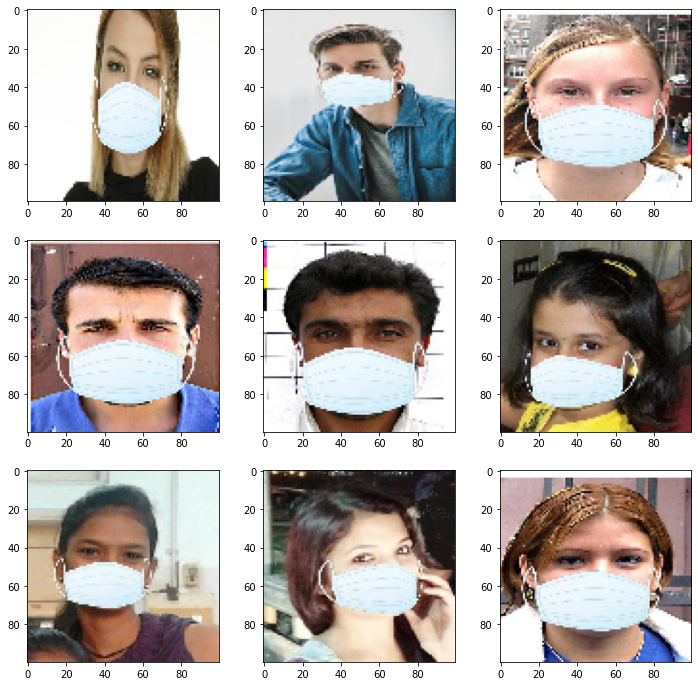

In [2]:
folder_path='D:/pds_project/mask_detection_dataset'
directory='/with_mask'
picture_size=100
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+directory+"/"+
                  os.listdir(folder_path + "/" + directory)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


In [3]:
CATEGORIES=['incorrect_mask','with_mask','without_mask']
#CATEGORIES=['with_mask','without_mask']
data=[]


for categories in CATEGORIES:
    path=os.path.join(folder_path,categories)
    labels=CATEGORIES.index(categories)
    for img in os.listdir(path):
        try:
            img_path=os.path.join(path,img)
            image=load_img(img_path,target_size=(224,224))
            image=img_to_array(image)
            data.append([image,labels])
        except Exception as e:
            pass
        
        


In [4]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data:
    x.append(feature)
    y.append(label)

x=np.array(x).reshape(-1,224,224,3)
y=np.array(y).reshape(-1,1)
x=x/225.0

In [5]:
print(x.shape)
print(y.shape)

(1813, 224, 224, 3)
(1813, 1)


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(x,y,epochs=10,validation_split=0.3)

Epoch 1/10
40/40 [==============================] - 19s 192ms/step - loss: 1.4863 - accuracy: 0.6990 - val_loss: 0.5969 - val_accuracy: 0.7868
Epoch 2/10
40/40 [==============================] - 4s 105ms/step - loss: 0.3068 - accuracy: 0.8928 - val_loss: 0.3078 - val_accuracy: 0.9007
Epoch 3/10
40/40 [==============================] - 4s 110ms/step - loss: 0.1624 - accuracy: 0.9504 - val_loss: 0.2348 - val_accuracy: 0.9265
Epoch 4/10
40/40 [==============================] - 4s 110ms/step - loss: 0.0715 - accuracy: 0.9787 - val_loss: 0.2056 - val_accuracy: 0.9375
Epoch 5/10
40/40 [==============================] - 4s 113ms/step - loss: 0.0731 - accuracy: 0.9811 - val_loss: 0.1866 - val_accuracy: 0.9504
Epoch 6/10
40/40 [==============================] - 5s 113ms/step - loss: 0.0312 - accuracy: 0.9945 - val_loss: 0.2258 - val_accuracy: 0.9357
Epoch 7/10
40/40 [==============================] - 5s 113ms/step - loss: 0.0253 - accuracy: 0.9937 - val_loss: 0.1965 - val_accuracy: 0.9375
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


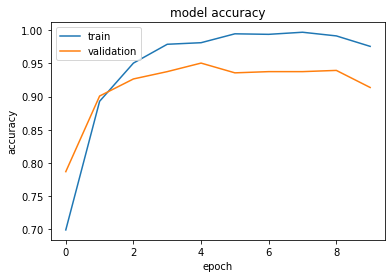

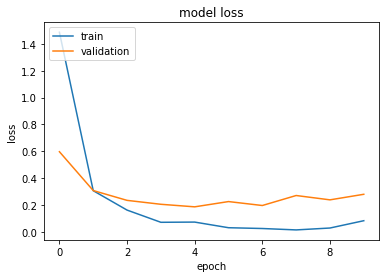

In [11]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
model.save('masked_face_identifier.h5')

In [13]:
model=load_model("masked_face_identifier.h5")
test_image=load_img("D:/pds_project/mask_detection_dataset/incorrect_mask/aug_5.jpg",target_size=(224,224))
test_image=img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

[[ 1.7657441 -0.9991758  3.635626 ]]


In [15]:
label=CATEGORIES[result.argmax()]
print(label)

without_mask
